## Exercício 3 - Replicando o gráfico de Minard

In [318]:
using DataFrames,Plots, VegaLite
using FilePaths, RDatasets

In [355]:
troops = RDatasets.dataset("HistData", "Minard.troops")
temp = RDatasets.dataset("HistData", "Minard.temp")
cities = RDatasets.dataset("HistData", "Minard.cities");

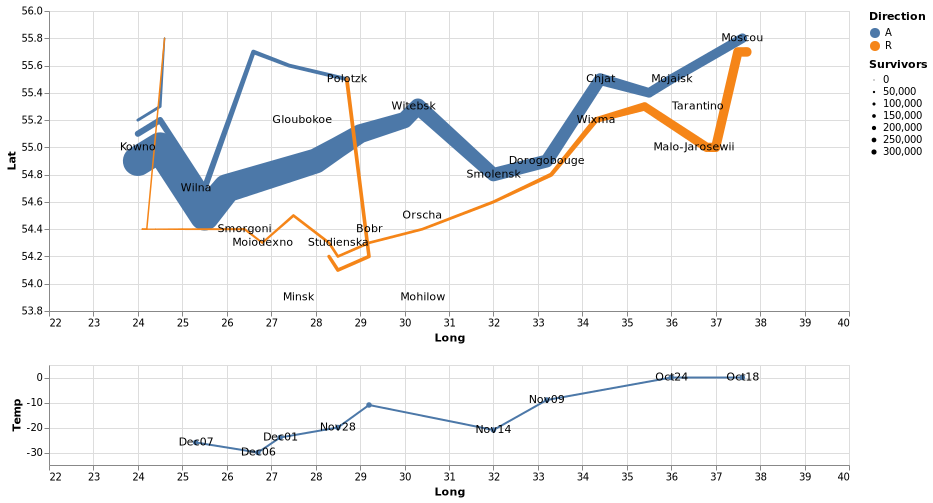

In [471]:
[
@vlplot(width=800, height=300) +
@vlplot(
    data=troops,
    mark={:trail,point=true,clip=true},
    x={"Long:q", scale={domain=[23,39]}},
    y={"Lat:q", scale ={domain = [53.8,56]}},
    size = {"Survivors:q", scale={"range" = [1,30]}},
    color="Direction:n",
    detail="Group:n",
    order ={field =:row, typ=:q }
) + 
@vlplot(mark={:text},
    data=cities,
    x={"Long:q", scale={domain=[23,39]}},
    y={"Lat:q", scale ={domain = [53.8,56]}},
    text="City:n") ;
@vlplot(width=800, height=100) +
@vlplot(mark={:line,point=true,clip=false},
    data=temp,
    x={"Long:q", scale={domain=[23,39]}},
    y={"Temp:q", scale={domain=[-31,1]}}
) + 
@vlplot(mark={:text},
    data=temp,
    x={"Long:q", scale={domain=[23,39]}},
    y={"Temp:q", scale={domain=[-31,1]}},
    text="Date:n",
    transform=[
        {filter="datum.Date !== null"}
    ]
)
    
]